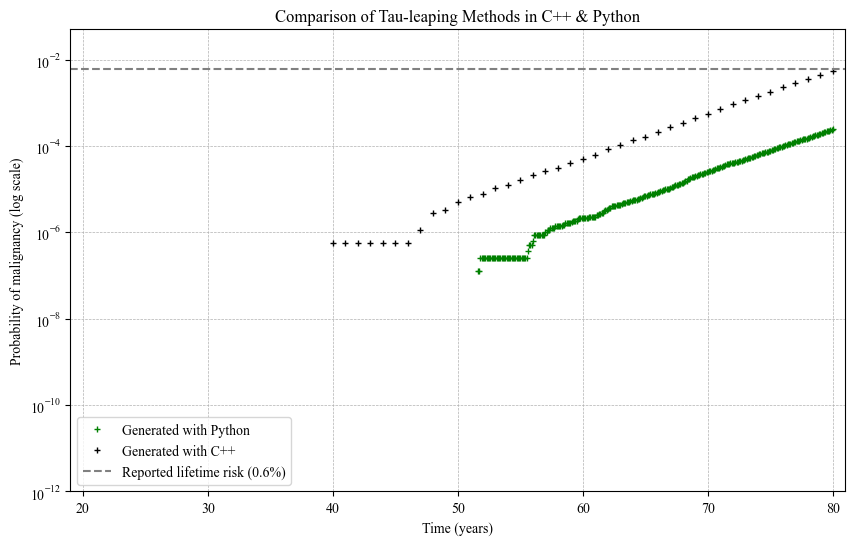

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Times New Roman')

# Load tau-leaping data from text files
time_points = pd.read_csv("time_points.txt", header=None).squeeze()  # Time points
probabilities = pd.read_csv("probability.txt", header=None).squeeze()  # Probabilities

# Load tau-leaping data from CSV
def process_csv(file_name):
    """Read and process CSV data to calculate cancer probabilities."""
    df = pd.read_csv(file_name, header=None)
    years = df[0]
    state_331 = df[38]  # (3,3,1) state
    state_341 = df[40]  # (3,4,1) state
    state_431 = df[48]  # (4,3,1) state
    state_441 = df[50]  # (4,4,1) state
    cancer_prob = state_331 + state_341 + state_431 + state_441
    return years, cancer_prob

csv_years, csv_probs = process_csv("test1.1.csv")  # Process data from CSV

def plot_with_markers(time_points, probabilities, csv_years, csv_probs):
    """Plot the tau-leaping trajectory with markers from text, CSV, and a report line."""
    plt.figure(figsize=(10, 6))

    # Plot the Python-generated data with markers
    plt.semilogy(time_points, probabilities, 'g+', label='Generated with Python', markersize=5)

    # Plot the CSV data with markers
    plt.semilogy(csv_years, csv_probs, 'k+', label='Generated with C++', markersize=5)

    # Add a horizontal dashed line for the reported lifetime risk
    plt.axhline(y=0.006, linestyle='--', color='gray', label='Reported lifetime risk (0.6%)')

    # Customize plot
    plt.xlim(19, 81)  # Set x-axis range
    plt.ylim(1e-12, 0.05)  # Set y-axis range
    plt.xlabel('Time (years)')
    plt.ylabel('Probability of malignancy (log scale)')
    plt.title('Comparison of Tau-leaping Methods in C++ & Python')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()

    # Save as PDF
    plt.savefig("Colorectal_Cancer_Tau_Leaping.pdf", format="pdf", bbox_inches="tight")

    # Show plot
    plt.show()

# Call the function to plot with markers
plot_with_markers(time_points, probabilities, csv_years, csv_probs)
